<a href="https://colab.research.google.com/github/albertoakel/Atividades_EBAC/blob/master/notebook/Teste_de_hipotese_exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Teste de Estatístico
---

**Objetivos** : Apresentar e exemplificar as etapas para realização de hipotese e estatístico.

---

O teste t de Student é uma ferramenta estatística que compara médias de grupos ou amostras. É usado para determinar se há uma diferença significativa entre os valores médios de amostras. Vamos iniciar com um problema simples, para uma amostra inicialmente e explorar algumas informações.


##**Contexto**
Suponha que você tenha uma amostra de notas e queira testar o valor médio. Assim temos 3 situações:
1) É menor que 7.0 ?
2) É maior que 7.0 ?
3) É diferente de 7.0 ?

Para cada uma desses casos, há uma sequência,que aqui definimos em 4 passos para o bom entendimento do procedimento.\
**Passo 1**: Definição do teste de hipótese;\
**Passo 2**: Cálculo do teste estatistico;\
**Passo 3**: Calculo do P valor;\
**Passo 4**: Avaliar P valor e α;

### **Passo 1: Definição do teste de hipótese**

O teste de hipóteses é um **método estatístico usado para tomar decisões** ou tirar conclusões sobre uma população com base em dados coletados. Ele nos ajuda a avaliar se uma determinada afirmação (**hipótese**) sobre um parâmetro populacional (como a média, proporção, variância etc.) é suportada pelos dados coletados.

No teste de hipóteses, a gente tem duas ideias para comparar:

1.   **Hipótese nula ($H_o$)**: nada de especial está acontecendo
2.   **Hipótese alternativa($H_1$)**: não é bem assim...o que está rolando.

A hipotese nula é a nossa preposição. É o que achamos sobre os dados ou  experimentos. Como saber se ela é resultado do acaso?
Como **Um teste estatistico + valor-p** pode nos dar um caminho.

Sendo redundante nas explicações, **em princípio, a hipótese nula é considerada a verdadeira. Ao confrontarmos a hipótese nula com os achados de uma amostra aleatória, verifica-se a sua plausibilidade o que nos leva a rejeitarmos ou não $H_o$**. Se não rejeitamos $H_o$, tomamo-la como verdadeira; caso contrário, tomamos $H_1$ como verdadeira.

Imagine ter uma amostra  com 10 notas de matemática aleatórias da oitava série e querer saber a média da amostra  é representativo para a média da escola, que é 7? Assim:
1. **Hipótese nula** ($Ho$): A média da amostra é igual à média da escola?
2. **Hipótese alternativa**($H_1$): A média da amostra é diferente da média da escola?


### **Passo 2: Cálculo do teste estatístico**

Um teste estatístico é um procedimento matemático usado para avaliar e tomar decições sobre uma população com base nos dados amostrais. Atráves dela, somos capazes de avaliar se uma determinada hipótese sobre um parâmetro populacional é suportada pelos dados coletados.
Para que serve um teste estatístico?

1. **Avaliar hipóteses:** Verificar se uma afirmação sobre uma população é válida.

2. **Comparar grupos:** Determinar se há diferenças significativas entre dois ou mais grupos.

3. **Identificar relações:** Avaliar se existe uma associação ou correlação entre variáveis.

4. **Tomar decisões:** Apoiar escolhas em cenários complexos, como em pesquisas científicas, negócios ou políticas públicas.

Há diferentes testes estátisticos como t de student, Z Qui-Quadrado. A tabela abaixo mostra algumas caracteristicas.

| Teste Estatístico                | Quando Usar                                      | Exemplo                                                        |
|----------------------------------|--------------------------------------------------|----------------------------------------------------------------|
| **Teste Z**                      | Comparar a média da amostra com a população quando σ é conhecido e $n \geq 30$ | "A média das notas de matemática do ENEM é significativamente diferente da média nacional?" |
| **Teste t de Student**           | Comparar médias de dois grupos quando σ é desconhecido e $n < 30$ | "As notas de matemática do ENEM são diferentes entre escolas públicas e privadas?" |
| **Teste Qui-Quadrado (χ²)**      | Comparar distribuições de frequências           | "A distribuição de notas é igual para diferentes regiões do país?" |
| **ANOVA (Análise de Variância)** | Comparar médias de mais de dois grupos          | "Há diferença na média das notas entre três estados diferentes?" |
| **Teste de Kolmogorov-Smirnov**  | Comparar distribuições estatísticas             | "A distribuição das notas da amostra reflete a distribuição da população total?" |

### **Passo 3: Calculo do P valor**

---

O valor-p é como um "termômetro" que mede se algo que encontramos é  sorte ou se é algo realmente. Imagine que você faz um experimento e acha um resultado. O valor-p diz qual a chance desse resultado acontecer "do nada", sem que nada especial esteja acontecendo. Se essa chance for muito pequena (valor-p pequeno), a gente começa a achar que talvez não foi só sorte, e sim que algo diferente está rolando.

---
como dito anteriormente, no teste de hipóteses, a gente duas ideias para confrontar os dados.A hipotese nula é a nossa preposição. É o que achamos sobre os dados ou  experimentos. Como saber se ela é resultado do acaso? **Um teste estatistico + valor-p** pode nos dar um caminho.
Dito isso, podemos dizer que o **valor-p é a probabilidade de um teste estatistico**. Ele é o delimitador no nivel de significância para rejeitar a hipotese nula. Por exemplo, um valor-p pequeno significa que a probabilidade é pequena considerando o teste estátistico, o que nos leva a rejeitar a hipótese nula.

Sendo redundante nas explicações, **A princípio, a hipótese nula é considerada a verdadeira. Ao confrontarmos a hipótese nula com os achados de uma amostra aleatória, verifica-se a sua plausibilidade o que nos leva a rejeitarmos ou não $H_o$**. Se não rejeitamos $H_o$, tomamo-la como verdadeira; caso contrário, tomamos $H_1$a como verdadeira.

#### CÁLCULO VALOR-P
Dependendo da hipótese alternativa ($H_1$), o cálculo do valor p pode ser feito de três formas:

**1) Valor-P unilateral à esquerda ($H_1: \mu \leqslant \mu_o$)**\
Aqui, testamos se a média amostral ( $\bar{x}$) é significamente menor que a média hipotética ($\mu_o$). O p-valor é a probabilidade de obter um valor menor ou igual ao estatístico de teste. Matematicamente falando:

$$P_{valor}= P(T\leqslant t)$$

Desta forma precisamos calcular a **Probabilidade acumulada P** até o valor encontrado em nosso teste estatísco. Antes de detalhar essa operação vamos ver como ficam as demais **H<sub>1</sub>**

**2) Valor-P unilateral à direita ($H_1: \mu\geqslant \mu_o$)**

Neste caso, testamos se a média amostral ( $\bar{x}$) é significamente maior que a média hipotética ($\mu_o$). O p-valor então é defindo por:

$$P_{valor}= P(T  \geqslant t)= 1-P(T\leqslant t)$$

Observe que definimos ele novamente em função do caso 1.Então novamente precisamos calcular a probabilidade acumulada **P** até o valor encontrado em nosso teste estatísco.

**3) Valor-P bicaudal ($H_1: \mu: \neq \mu_o$)**

No caso verificamos se a média amostral( $\bar{x}$) é significamente diferente da média hipotética($\mu_o$). Para uma distribuição t de Student ou normal, ele é simétrica entorno da média. Assim:
$$P(T\leqslant -t)=P(T\geqslant t)$$
desta forma,  P-valor bicaudal pode ser calculado como:
$$P_{valor}= 2 \times P(T  \leqslant  -|t|) $$
ou
$$P_{valor}= 2 \times P(T  \geqslant |t|) $$

Uma outra forma de pensar sobre o teste bicaudal é como estamos buscando a probabilidade de observar um valor tão extremo ou mais extremo que o valor observado (), em ambas as direções, procuramos pela menor probabilidade. Então uma opção de calculo é escolher a de menor probabilidade. A multiplicação por 2 garante que estamos considerando os dois lados da distribuição.

#### **Probabilidade Acumulada**

Imagine um sequencia númerica **a**
$$a=[1,3,5,7,9,11,13,15]$$
Um somatório acumulado é uma operação que consiste em calcular a soma parcial ou a soma progressiva dessa sequencia númerica.Assim $S_a$ acumulado a é dado por:
$$S=[1,4,9,16,25,36,49]$$
Agora imagine uma distribuição normal dada pela função f(x). A soma acumulada desta curva é dada por uma expressão do tipo:

$$S(t)=\sum_{i=1}^{t} f(x_i)$$

Onde f(x) é nossa distribuição( seja ela qual for) e S(t) é nossa distribuição acumulada até o valor t definido. Nada tão complicado. As figuras 1a e 1b mostram os gráficos da distribuição de probalidade normal e acumulada.

---

Em *python* a operação é bem simples, podemos usar o recurso de soma acumulada *np.cumsum* em nossa distribuição e encontrar nossa soma acumulada até o valor t=0. o código abaixo exemplifica esta tarefa.
```python
y=norm.pdf(x,0,1)   # distribuição normal
c=np.cumsum(y)      
c=c/max(c)          # para normalizar os valores entre 0-1.
id=np.where(x>=t)   # para encontrar o indice de x que correspondente
temp=id[0][0]
print(c[temp])      #para imprimir o valor de C(t).
```

O exercicio vale a pena para entendimento dos processos, porém aqui faremos de forma mais objetiva e adotaremos alguns pacotes do módulo **scipy.stats, como norm.cdf que executa exatamente a mesma coisa**.

---

### **Passo 4: Avaliar Valor-p e α**


O **p-valor** e o **nível de significância α** são fundamentais para a tomada de decisão em testes estatísticos. Eles ajudam a determinar se devemos rejeitar ou não a hipótese nula ($H_o$).  

- **Valores Pequenos de p (< α)** → Indicam que os dados observados são improváveis sob ($H_o$), então rejeitamos \($H_o$).  
- **Valores Grandes de p (≥ α)** → Indicam que os dados observados não fornecem evidências suficientes para rejeitar \($H_o$).  


**O que é o Nível de Significância (α)?**  
É um valor pré-definido que estabelece o critério para rejeição de ($H_0$). Ele representa a **probabilidade de cometer um erro tipo I** que é rejeitar ($H_0$) quando ela é verdadeira.  

Os valores comuns de α são:  
- **01%** : Critério mais rigoroso, usado em estudos críticos (exemplo: pesquisa médica).
- **05%** : Margem de erro comum na maioria das pesquisas.    
- **10%**: Critério mais flexível, usado em estudos exploratórios.


A tomada de decisão é baseada  na comparação entre **p-valor** e **α**:

1. **Se $ p < \alpha $, rejeitamos ($H_0$):**  
   - Há evidências estatísticas para aceitar a hipótese alternativa ($H_1$).  
   - O resultado é considerado **estatisticamente significativo**.  

2. **Se $ p \geq \alpha$ , não rejeitamos $H_0$:**  
   - Não há evidências suficientes para rejeitar $H_0$.  
   - O resultado **não é estatisticamente significativo**.  

| **Condição**       | **Decisão**        | **Interpretação**                                |
|--------------------|-------------------|------------------------------------------------|
| \( $p < \alpha$ \)  | Rejeitar \($H_0$\)   | O resultado é estatisticamente significativo   |
| \( $p \geq \alpha$ \) | Não rejeitar \($H_0$\) | Não há evidências estatísticas suficientes |

Essa análise é essencial para validar hipóteses e evitar conclusões erradas com base nos dados.


In [3]:
#@title Distribuição normal e acumulada
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
#from IPython.display import display, Math
from scipy.stats import norm
from scipy.stats import t as ts

#1)-As médias das notas é significamente diferente de 7?

# Generate data for the normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Calculate the cumulative distribution function
cumulative_y = norm.cdf(x, 0, 1)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the normal distribution
axes[0].plot(x, y)
axes[0].set_title('Figura 1a: Distribuição Normal')
axes[0].set_xlabel('x')
axes[0].set_xlim(-4,4)
axes[0].set_ylim(0,0.4)


axes[0].set_ylabel('Densidade de Probabilidade')


# Plot the cumulative distribution
axes[1].plot(x, cumulative_y)
axes[1].set_title('Figura 1b: Distribuição Acumulada')
axes[1].set_xlabel('x')
axes[1].set_xlim(-4,4)
axes[1].set_ylim(0,1)


axes[1].set_ylabel('Probabilidade Acumulada')


# Adjust layout for better visualization
plt.tight_layout()
plt.show()


TypeError: 

## **Exemplos e Passo a passo**

A seguir iremos avaliar 3 testes de hipóteses, usando o mesmo conjunto de dados.

### **Caso 1:** $\bar{x}$ < $H_o$

Vamos começar pensando no primeiro caso como exemplo, os demais, seguirão os mesmos passos lógicos.

**Passo 1: Definir as hipóteses:**
*   $H_o$: A média das notas é menor 7.0 (hipótese nula)
*   $H_1$A média das notas não é menor 7.0 (hipótese alternativa).

**Passo 2: Coletar os dados:**
notas = [6.5, 7.2, 6.8, 7.5, 6.9, 7.1, 6.7, 7.4, 6.6, 7.3]

**Passo 3: Calcular teste t**:

*   Média das amostras($\bar{x}$);
*   Desvio Padrão das amostras (s);

Como $\bar{x}$ = 7.0
e $s$ = 0.316 podemos calcular **teste-t**, assim:
$$t=\frac{( \bar{x}-\mu_o)\sqrt{\nu}}{s}$$
onde $\nu$ graus de liberdade ($\nu=n-1$). Por fim, encontramos t=-0.198

**Passo 4**: Cálculo do Valor-P
Como estamos buscando um valor menor que a nossa hipótese nula( $\bar{x}$ < $H_o$). O P-valor unicaudal à esquerda definido por:
$$P_{valor}= P(T\leqslant t)$$

como t=-0.198 então: $$P_{valor}= P(T\leqslant -0.198)$$\
Nosso primeiro cálculo aqui é encontrar a probabilidade acumulada até o valor de t, assim encontrar $P(T\leqslant -0.198)$. Aqui temos que avaliar basicamente o somotário acumulado da distribuição t de Student  até o valor t. A figura 1 mostra graficamente o que isso representa. Assim encontramos Valor-P=0.423.


**Passo 5**: Avaliar valor-p x α
A ultima etapa é comparar os resultados do valor-p com nivel de signficância adotado. Aqui usaremos 95%, assim: $$α=1-0.95=0.05$$

finalmente comparando os resultados.

*   **valor-p > α** :Não há evidência estatística para concluir que a média das notas é significativamente menor que Ho
*   **valor-p < α** : Rejeitamos a hipótese nula. Há evidências estatísticas para concluir que a média das notas é significativamente menor.

Como **0.423 > α**, concluimos que não há evidencias estatística para concluir que a média das notas é menor que 7.


### **Caso 2:** $\bar{x}$ > $H_o$
**Passo 1: Definir as hipóteses:**
*   $H_o$: A média das notas é maior 7.0 (hipótese nula)
*   $H_1$ A média das notas não é maior 7.0 (hipótese alternativa).

De fato, como temos o mesmo conjuto de dados, todos os valores a seguir serão identicos ao primeiro caso, assim pulamos diretamente para o **passo 4**

**Passo 4**: Cálculo do Valor-P \

O teste é unilateral à direita, então o p-valor é a probabilidade de obter um valor de t maior ou igual ao calculado (-0.189) sob a distribuição t de Student ..

Como estamos buscando um valor maior que a nossa hipótese nula( $\bar{x}$ < $H_o$). O P-valor é definido por:
$$P_{valor}= P(T  \geqslant -0.189)= 1-P(T\leqslant -0.189)$$
como P(T < -0.189) = 0.423
$$P(T  \geqslant -0.189)= 1-0.423=0.577$$
Assim **valor-p=0.577**.

**Passo 5**: Avaliar valor-p x α
O p-valor é **0.572, que é maior que o nível de significância α 0.05**.Portanto, não há evidência estatística para concluir que a média das notas é significativamente maior que 7.

### **Caso 3:** $\bar{x}$ $\neq$ $H_o$
**Passo 1: Definir as hipóteses:**
*   $H_o$: A média das notas é igual 7.0 (hipótese nula)
*   $H_1$ A média das notas não é diferente 7.0 (hipótese alternativa).\
Novamente pulamos diretamente para o **passo 4**

**Passo 4**: Cálculo do Valor-P \
O teste é bicaudal, então o p-valor é a probabilidade de obter um valor de $|t|$ maior ou igual ao valor absoluto do calculado. O P-valor deve escolher o menor valor das probabilidades acumuladas. Assim:
$$P_{valor}= 2P(T\leqslant -0.189)$$
assim **P-valor=2 $\times$0.423=0.826**. \
**Observação:** A outra ponta, ou seja, $P(\geqslant -0.189)=0.572$, portanto maior que a utilizada.

**Passo 5**: Avaliar valor-p x α

 p-valor é 0.856, que é maior que o nível de significância α =0.05. Portanto, não rejeitamos a hipótese nula. Não há evidência estatística para concluir que a média das notas é significativamente diferente de 7

In [2]:
#@title Avaliação dos casos 1, 2 e 3
import numpy as np
import math as ma
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from IPython.display import display, Math
from scipy.stats import norm
from scipy.stats import t as ts

#1)-As médias das notas é significamente diferente de 7?
#Teste t de Student
#Ho as notas tem média 7
#Ha as notas são diferente de 7
notas_0=[6.5, 7.2, 6.8, 7.5, 6.9, 7.1, 6.7, 7.4, 6.6, 7.1];
notas_1=[2, 3, 6.8, 7.5, 5.9, 4.1, 6.7, 7.4, 6.6, 7.1];  # sig menor
notas_2=[9, 7.2, 6.8, 7.5, 9, 7.1, 6.7, 7.4, 9, 7.1];    # sig maior
notas_3=[1, 4, 6.8, 7.5, 2, 7.1, 6.7, 7.4, 4, 5];        # sig diferente
notas=notas_0
muo=7
ho=7


#Calcular média e desvio das amostas
n=len(notas)
x_hat=np.mean(notas)
s=np.std(notas,ddof=1)


t=(x_hat-ho)/(s/np.sqrt(n))
df=n-1

#caso 1
p_valor_e = ts.cdf(t, df)
#caso 2
p_valor_d = 1-ts.cdf(t, df)
#caso 3
p_valorB = 2*ts.cdf(t, df)

p_valor = ts.cdf(t, df)

print('Média               :',x_hat)
print('Desvio padrão       :',s)
print('teste-t             :',t)

print('')

print('p-valor (caso 1)    :',p_valor_e)
if p_valor_e > 0.05:
  print('Não há evidência estatística para concluir que a média das notas é significativamente menor que 7')
else:
  print('Rejeitamos a hipótese nula. Portanto, há evidências estatísticas para concluir que \n a média das notas é significativamente menor que 7')

print('')

print('p-valor (caso 2)    :',p_valor_d)
if p_valor_d > 0.05:
  print('Não há evidência estatística para concluir que a média das notas é significativamente maior que 7')
else:
  print('Rejeitamos a hipótese nula. Portanto, há evidências estatísticas para concluir que \n a média das notas é significativamente maior que 7')

print('')
print('p-valor (caso 3)    :',p_valorB)
if p_valorB > 0.05:
  print('Não há evidência estatística para concluir que a média das notas é significativamente diferente de 7')
else:
  print('Rejeitamos a hipótese nula. Portanto, há evidências estatísticas para concluir que \n a média das notas é significativamente diferente que 7')


TypeError: 

In [2]:
#@title Clique para expandir e ver o código oculto

#figura1  P-Valor
x = np.linspace(-4,4,100)
y=stats.t.pdf(x,0,1);
c=ts.cdf(x,df)
fig, ax = plt.subplots(1, figsize=(6, 6))
p_valor=ts.cdf(t, df)

ax.plot(x,c,'r-');
ax.set_title('fig 2 : Relação teste t e P-valor.')
ax.vlines(x=t,ymin=0,ymax=ts.cdf(t,df),color='gray',linestyles='dashed',
     label="mean: {:.1f}".format(t))
ax.hlines(y=p_valor,xmin=-4,xmax=t,color='gray',linestyles='dashed',
     label="mean: {:.1f}".format(t))
ax.set_ylim(0, max(c)*1.01)
ax.set_xlim(-4,4)
#preenchimento da região
condição=(c <= p_valor)
ax.fill_between(x, c,where=condição,color='dodgerblue',alpha=0.8);
ax.set_xlabel('teste estatítico');
ax.set_ylabel('Valor-p');

NameError: name 'stats' is not defined

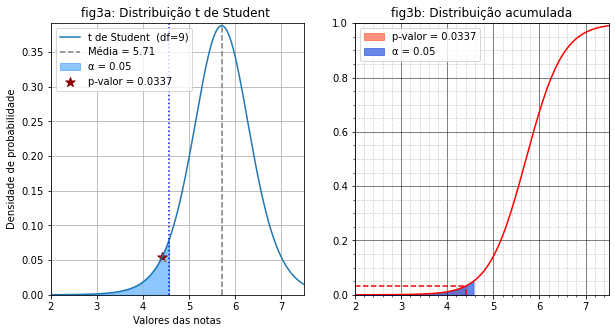

In [2]:
#@title Quando média é significamente menor
#Figuras com eixos normalizados
notas_1=[2, 3, 6.8, 7.5, 5.9, 4.1, 6.7, 7.4, 6.6, 7.1]; # sig menor
notas=notas_1
n=len(notas)
x_hat=np.mean(notas)
s=np.std(notas,ddof=1)
t=(x_hat-ho)/(s/np.sqrt(n))
df=n-1
p_valor_e = ts.cdf(t, df)

# Intervalo das notas
x_min = min(notas)  # Valor mínimo das notas
x_max = max(notas)  # Valor máximo das notas
x = np.linspace(x_min, x_max, 1000)
alpha=0.05  #confiança
t_critical = ts.ppf(alpha,df)

# Gerar valores da distribuição t de Student  ajustados ao eixo x
fator=(x - x_hat) / (s / np.sqrt(n))
y = ts.pdf(fator , df)  #Distribuição
c=ts.cdf( fator, df)     #Distribuição Acumulada

# Encontrar posições relativos ao valor P e alpha
p_valor=p_valor_e
x_pvalor = x[c <= p_valor]
x_alpha=x[c <= alpha]
x_alpha2=x_hat-(x_hat-x_alpha[-1])


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(x, y, label=f"t de Student  (df={df})")
ax[0].set_title('fig3a: Distribuição t de Student ')

# # Preencher a área correspondente ao nível de significância (α = 0.05)
condicao_alpha=(x<=x_alpha[-1])
ax[0].fill_between(x,y,where=condicao_alpha,color='dodgerblue', alpha=0.5,label=f"α = {alpha}")

# Preencher a área correspondente ao p-valor
ax[0].scatter(x_pvalor[-1],y[np.where(x == x_pvalor[-1])[0][0]],marker='*',s=100,color='darkred', label=f"p-valor = {p_valor:.4f}");

#Linha vertical para a média das notas
ax[0].axvline(x_hat, color='gray', linestyle='--', label=f"Média = {x_hat:.2f}")

# # Linha vertical para o valor crítico de t
ax[0].axvline(x_alpha2, color='blue', linestyle=':')

ax[0].set_ylim(0, max(y)*1.01)
ax[0].set_xlim(x_min,x_max)
ax[0].set_xlabel("Valores das notas")
ax[0].set_ylabel("Densidade de probabilidade")
ax[0].legend()
ax[0].grid()

#-------------------------------------------------------------------------------
# Distribuição acumulada
ax[1].plot(x,c,'r-');
ax[1].set_title('fig3b: Distribuição acumulada')
ax[1].vlines(x=x_pvalor[-1],ymin=0,ymax=p_valor,color='red',linestyles='dashed')
ax[1].hlines(y=p_valor,xmin=x_min,xmax=x_pvalor[-1],color='red',linestyles='dashed')
# ax[1].set_ylim(0, max(c)*1.01)
ax[1].set_xlim(x_min,x_max)
# #preenchimento da região

ax[1].fill_between(x, c,where=c <= p_valor,color='tomato', alpha=0.7, label=f"p-valor = {p_valor:.4f}");
ax[1].fill_between(x, c,where=c <= alpha,color='royalblue', alpha=0.8, label=f"α = {alpha}")

ax[1].set_ylim(0, max(c)*1.01)
# ax[1].set_xlabel('teste estatítico');
# ax[1].set_ylabel('Valor-p');
ax[1].legend()
ax[1].grid(True, which='major', linestyle='-', linewidth=0.5, color='black')
ax[1].grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray')
ax[1].minorticks_on()


In [3]:
#@title Quando média é significamente maior

notas_2=[9, 7.2, 6.8, 7.5, 9, 7.1, 6.7, 7.4, 9, 7.1];  #sig maior
notas=notas_2
n=len(notas)
x_hat=np.mean(notas)
s=np.std(notas,ddof=1)
t=(x_hat-ho)/(s/np.sqrt(n))
df=n-1
p_valor_d = 1-ts.cdf(t, df)

# Intervalo das notas
x_min = min(notas)  # Valor mínimo das notas
x_max = max(notas)  # Valor máximo das notas
x = np.linspace(x_min, x_max, 1000)
alpha=0.05  #confiança
t_critical = ts.ppf(alpha,df)

# Gerar valores da distribuição t de Student  ajustados ao eixo x
fator=(x - x_hat) / (s / np.sqrt(n))
y = ts.pdf(fator , df)  #Distribuição
c=ts.cdf( fator, df)     #Distribuição Acumulada

# Encontrar posições relativos ao valor P e alpha
p_valor=p_valor_d
x_pvalor = x[c <= p_valor]
x_alpha=x[c <= alpha]

x_alpha2=x_hat+(x_hat-x_alpha[-1])

x_pvalor2=x_hat+(x_hat-x_pvalor[-1])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(x, y, label=f"t de Student  (df={df})")
ax[0].set_title('fig4a: Distribuição t de Student ')

#x_pvalor=x[x <= x_hat + t * (s / np.sqrt(n))]
#x_alpha = x[x <= x_hat + t_critical * (s / np.sqrt(n))]
# # Preencher a área correspondente ao nível de significância (α = 0.05)
condicao_alpha=(x>=x_alpha2)
ax[0].fill_between(x,y,where=condicao_alpha,color='dodgerblue', alpha=0.5,label=f"α = {alpha}")
# Preencher a área correspondente ao p-valor
ax[0].scatter(x_pvalor2,y[np.where(x == x_pvalor[-1])[0][0]],marker='*',s=100,color='darkred', alpha=1, label=f"p-valor = {p_valor:.4f}");


#Linha vertical para a média das notas
ax[0].axvline(x_hat, color='gray', linestyle='--', label=f"Média = {x_hat:.2f}")

# # Linha vertical para o valor crítico de t
t_critical_x = x_hat + t_critical * (s / np.sqrt(n))
ax[0].axvline(x_alpha2, color='blue', linestyle=':')


# # Configurações do gráfico
ax[0].set_ylim(0, max(y)*1.01)
ax[0].set_xlim(x_min,x_max)
ax[0].set_title("Distribuição t de Student  ")
ax[0].set_xlabel("Valores das notas")
ax[0].set_ylabel("Densidade de probabilidade")
ax[0].legend()
ax[0].grid()

#-------------------------------------------------------------------------------
# Distribuição acumulada
ax[1].plot(x,c,'r-');
ax[1].set_title('fig4b: Distribuição acumulada')
ax[1].vlines(x=x_pvalor[-1],ymin=0,ymax=p_valor,color='red',linestyles='dashed')
ax[1].hlines(y=p_valor,xmin=x_min,xmax=x_pvalor[-1],color='red',linestyles='dashed')
# ax[1].set_ylim(0, max(c)*1.01)
ax[1].set_xlim(x_min,x_max)
# #preenchimento da região

ax[1].fill_between(x, c,where=c <= p_valor,color='tomato', alpha=0.7, label=f"p-valor = {p_valor:.4f}");
ax[1].fill_between(x, c,where=c <= alpha,color='blue', alpha=0.8, label=f"α = {alpha}")

ax[1].set_ylim(0, max(c)*1.01)
# ax[1].set_xlabel('teste estatítico');
# ax[1].set_ylabel('Valor-p');
ax[1].legend()
ax[1].grid(True, which='major', linestyle='-', linewidth=0.5, color='black')
ax[1].grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray')
ax[1].minorticks_on()


NameError: name 'ho' is not defined

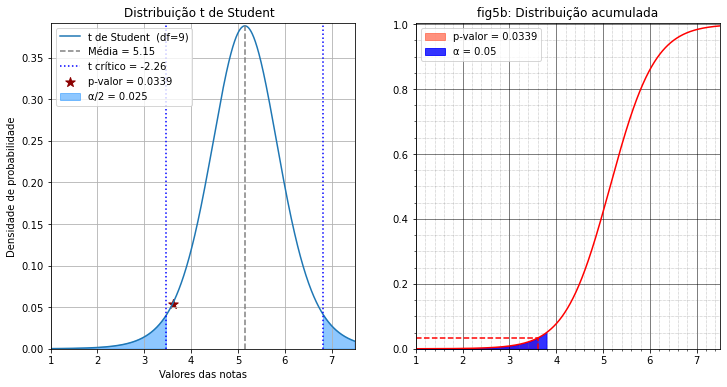

In [9]:
#@title Quando média é significamente diferente

notas_3=[1, 4, 6.8, 7.5, 2, 7.1, 6.7, 7.4, 4, 5];  #sig diferente
notas=notas_3
n=len(notas)
x_hat=np.mean(notas)
s=np.std(notas,ddof=1)
t=(x_hat-ho)/(s/np.sqrt(n))
df=n-1

p_valor_e = ts.cdf(t, df)   #a esquerda
p_valor_d = 1-ts.cdf(t, df) #a direita
if p_valor_e < p_valor_d:
  p_valorB=2*p_valor_e
else:
  p_valorB=2*p_valor_d



# Intervalo das notas
x_min = min(notas)  # Valor mínimo das notas
x_max = max(notas)  # Valor máximo das notas
x = np.linspace(x_min, x_max, 1000)
alpha=0.05/2  #confiança
t_critical = ts.ppf(alpha,df)

# Gerar valores da distribuição t de Student ent  ajustados ao eixo x
fator=(x - x_hat) / (s / np.sqrt(n))
y = ts.pdf(fator , df)   #Distribuição
c=ts.cdf( fator, df)     #Distribuição Acumulada

# Encontrar posições relativos ao valor P e alpha
p_valor=p_valorB
x_pvalor = x[c <= p_valor]
x_alpha=x[c <= alpha]

id=np.where(x<=x_alpha[-1])
temp=id[0][-1]
y_alpha=y[temp]

id=np.where(x<=x_alpha[-1])
temp=id[0][-1]
y_alpha=y[temp]


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(x, y, label=f"t de Student  (df={df})")
ax[0].set_title('fig5a: Distribuição t de Student ')

# Preencher a área correspondente ao p-valor
condicao_pvalor=(x<=x_pvalor[-1])
#ax[0].fill_between(x, y,where=(x<=x_pvalor[-1]),color='darkred', alpha=0.4, label=f"p-valor = {p_valor:.4f}");
ax[0].scatter(x_pvalor[-1],y[np.where(x == x_pvalor[-1])[0][0]],marker='*',s=100,color='darkred', label=f"p-valor = {p_valor:.4f}");


# # Preencher a área correspondente ao nível de significância (α = 0.05)

condicao_alpha=(y<=y_alpha)
ax[0].fill_between(x,y,where=condicao_alpha,color='dodgerblue', alpha=0.5,label=f"α/2 = {alpha}")


#Linha vertical para a média das notas
ax[0].axvline(x_hat, color='gray', linestyle='--', label=f"Média = {x_hat:.2f}")

# # Linha vertical para o valor crítico de t
t_critical_x = x_hat + t_critical * (s / np.sqrt(n))
ax[0].axvline(x_alpha[-1], color='blue', linestyle=':', label=f"t crítico = {t_critical:.2f}")
x_alpha2=x_hat+(x_hat-x_alpha[-1])
ax[0].axvline(x_alpha2, color='blue', linestyle=':')


# # Configurações do gráfico

ax[0].set_ylim(0, max(y)*1.01)
ax[0].set_xlim(x_min,x_max)
ax[0].set_title("Distribuição t de Student  ")
ax[0].set_xlabel("Valores das notas")
ax[0].set_ylabel("Densidade de probabilidade")
ax[0].legend()
ax[0].grid()

# Distribuição acumulada
ax[1].plot(x,c,'r-');
ax[1].set_title('fig5b: Distribuição acumulada')
ax[1].vlines(x=x_pvalor[-1],ymin=0,ymax=p_valor,color='red',linestyles='dashed')
ax[1].hlines(y=p_valor,xmin=x_min,xmax=x_pvalor[-1],color='red',linestyles='dashed')
# ax[1].set_ylim(0, max(c)*1.01)
ax[1].set_xlim(x_min,x_max)
# #preenchimento da região


ax[1].fill_between(x, c,where=c <= p_valor,color='tomato', alpha=0.7, label=f"p-valor = {p_valor:.4f}");
ax[1].fill_between(x, c,where=c <= 2*alpha,color='blue', alpha=0.8, label=f"α = {2*alpha}")

ax[1].set_ylim(0, max(c)*1.01)
# ax[1].set_xlabel('teste estatítico');
# ax[1].set_ylabel('Valor-p');
ax[1].legend()
ax[1].grid(True, which='major', linestyle='-', linewidth=0.5, color='black')
ax[1].grid(True, which='minor', linestyle=':', linewidth=0.5, color='gray')
ax[1].minorticks_on()

In [7]:
#@title Comparação curva normal e t de Student
x = np.linspace(-3,3,1000)
df=1
yt1=ts.pdf(x,1)   # distribuição t de Student
yt5=ts.pdf(x,5)   # distribuição t de Student
yt10=ts.pdf(x,10)   # distribuição t de Student
yt20=ts.pdf(x,20)   # distribuição t de Student
yt30=ts.pdf(x,30)



yn=norm.pdf(x)   # distribuição normal
plt.plot(x,yn,'k',label='distribuição normal')

plt.plot(x,yt1,'b--',label='distribuição t de Student  df=1')
plt.plot(x,yt5,'g--',label='distribuição t de Student  df=5')
plt.plot(x,yt10,'m--',label='distribuição t de Student  df=10')
plt.plot(x,yt20,'r--',label='distribuição t de Student  df=20')
plt.plot(x,yt30,'y--',label='distribuição t de Student  df=30')
plt.legend()


NameError: name 'ts' is not defined